In [1]:
from __future__ import print_function

import math
import funs

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

C:\Users\Jergb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Nodos:
2; 5.
### Variables:
TEMPERATURA; HUMEDAD RELATIVA; HUMEDAD DE LA TIERRA; NIVEL UV; INTENSIDAD LUMÍNICA.

In [2]:
# Se leen los datos desde el archivo medidas.csv
datos=pd.read_csv('medidas.csv')
# Se define una tabla que contiene las mediciones de un único nodo
nodo = 2
mediciones_cacao = datos.query('NODO == %s' %nodo).reset_index(drop=True)
# Se define la variable que se va a analizar
variable='TEMPERATURA'

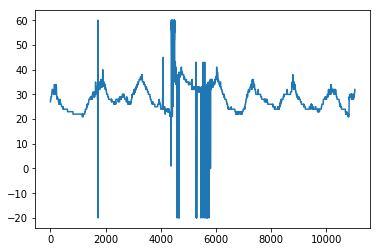

In [3]:
mediciones_cacao['Hora'] = [pd.Timestamp(x).hour for x in mediciones_cacao['TIME']]
mediciones_cacao.loc[:, 'TIME'] = [pd.Timestamp(x) for x in mediciones_cacao['TIME']]
cols = list(mediciones_cacao.columns.values)
cols =['IDMEDIDA', 'NODO', 'TEMPERATURA', 'HUMEDAD RELATIVA', 'HUMEDAD DE LA TIERRA',\
                    'NIVEL UV', 'INTENSIDAD LUMÍNICA', 'Hora', 'TIME']
mediciones_cacao[cols]
mediciones_cacao.loc[:, 'TEMPERATURA'].plot()

In [4]:
len(mediciones_cacao)

11042

In [5]:
mediciones,duracion=funs.separa_datos(mediciones_cacao,60)
print(duracion)

               inicio                 fin  datos
0 2018-05-09 09:49:00 2018-05-10 14:38:00   1722
1 2018-05-23 09:23:00 2018-05-26 07:01:00   4141
2 2018-06-05 07:12:00 2018-06-09 05:04:00   4971
3 2018-06-09 06:48:00 2018-06-09 12:24:00    177
4 2018-06-11 05:52:00 2018-06-11 06:16:00     25


In [15]:
medicion=mediciones[2]

import math
logT = [math.log(x) for x in tabla[var]]
tabla

,IDMEDIDA,NODO,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,NIVEL UV,INTENSIDAD LUMÍNICA,Hora
count,4971.0,4971.0,4971.0,4971.0,4971.0,4971.0,4971.0,4971.0
mean,16691.3,2.0,27.7,24.3,5.6,0.0,3023.8,11.6
std,2861.8,0.0,3.8,7.8,3.0,0.0,2873.4,6.7
min,11744.0,2.0,21.0,12.0,1.8,0.0,0.0,0.0
25%,14214.0,2.0,24.0,18.0,3.4,0.0,0.0,6.0
50%,16690.0,2.0,27.0,21.0,5.2,0.0,5630.0,12.0
75%,19171.0,2.0,30.0,32.0,6.6,0.0,5841.0,17.0
max,21589.0,2.0,41.0,41.0,28.4,0.0,5912.0,23.0


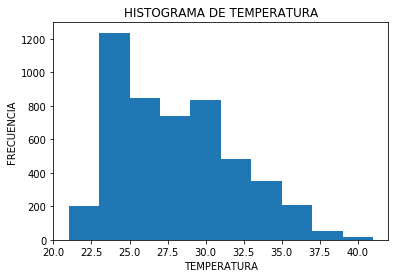

<Figure size 432x288 with 0 Axes>

In [16]:
# Presenta la distribución de los datos en un histograma
plt.hist(medicion[variable])
plt.title('HISTOGRAMA DE %s' %variable)
plt.xlabel(variable)
plt.ylabel('FRECUENCIA')
plt.figure()
plt.plot(medicion)
# Permite visualizar el resumen estadístico de la variableiable
medicion.describe()

In [17]:
delta=np.array((mediciones[variable].iloc[1:])-np.array(mediciones[variable].iloc[0:-1]))
Delta=pd.DataFrame()
Delta['Atributo']=mediciones[variable].iloc[1:].reset_index(drop=True)
Delta['Target']=mediciones[variable].iloc[0:-1].reset_index(drop=True)
Delta

,Atributo,Target
0,33,33
1,33,33
2,33,33
3,33,33
4,33,33
...,...,...
4965,22,22
4966,23,22
4967,23,23
4968,24,23


In [20]:
delta=np.array((mediciones_cacao[variable].iloc[1:])-np.array(mediciones_cacao[variable].iloc[0:-1]))
Delta=pd.DataFrame()
Delta['Atributo']=mediciones_cacao[variable].iloc[1:].reset_index(drop=True)
Delta['Target']=mediciones_cacao[variable].iloc[0:-1].reset_index(drop=True)
Delta

,Atributo,Target
0,28,27
1,28,28
2,28,28
3,28,28
4,28,28
...,...,...
11036,31,31
11037,31,31
11038,31,31
11039,31,31


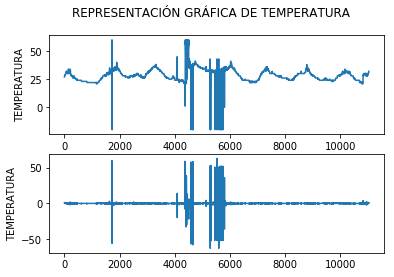

In [22]:
plt.suptitle('REPRESENTACIÓN GRÁFICA DE %s' %variable)
plt.subplot(211)
mediciones_cacao[variable].plot()
plt.ylabel('%s' %variable)
plt.subplot(212)
plt.ylabel('%s' %variable)
plt.plot(delta)

Text(0,0.5,'TEMPERATURA PARA UN TIEMPO t+1')

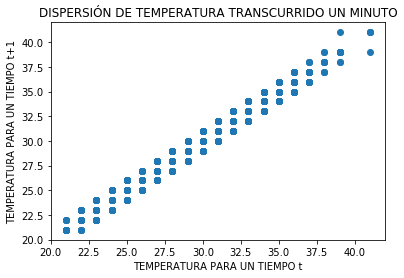

In [10]:
plt.scatter(medicion[variable].iloc[0:-1],medicion[variable].iloc[1:])
plt.title('DISPERSIÓN DE %s TRANSCURRIDO UN MINUTO' %variable)
plt.xlabel('%s PARA UN TIEMPO t' %variable)
plt.ylabel('%s PARA UN TIEMPO t+1' %variable)

In [11]:
type(delta)

numpy.ndarray

In [12]:
Delta.to_csv('Delta.csv', index=False)

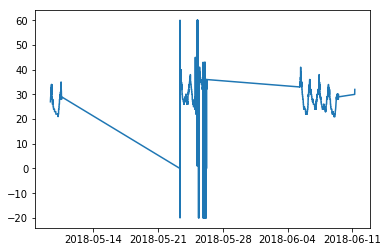

In [13]:
plt.plot(mediciones_cacao.TIME,mediciones_cacao.TEMPERATURA)